## Simulation Analysis

1. True population density analysis (model precision and accuracy) of entire data set. Between total hits and actual hits.

2. Density estimation changes between multiple combinations (animals, paths, camera, uav_paths, uav_speed, bias)

Loading in simulations and packages ..

In [55]:
#clear environments
rm(list=ls())

library(dplyr)
library(geosphere)
library(reshape2)
library(ggplot2)
library(ggthemes)

# Run 1 simulations
sim1 <- read.csv("../Data/Simulations/Run_2_1200/sim1.csv", header = T)
sim2 <- read.csv("../Data/Simulations/Run_2_1200/sim2.csv", header = T)
sim3 <- read.csv("../Data/Simulations/Run_2_1200/sim3.csv", header = T)
sim4 <- read.csv("../Data/Simulations/Run_2_1200/sim4.csv", header = T)
sim5 <- read.csv("../Data/Simulations/Run_2_1200/sim5.csv", header = T)
sim6 <- read.csv("../Data/Simulations/Run_2_1200/sim6.csv", header = T)
sim7 <- read.csv("../Data/Simulations/Run_2_1200/sim7.csv", header = T)
sim8 <- read.csv("../Data/Simulations/Run_2_1200/sim8.csv", header = T)
sim9 <- read.csv("../Data/Simulations/Run_2_1200/sim9.csv", header = T)
sim10 <- read.csv("../Data/Simulations/Run_2_1200/sim10.csv", header = T)
sim11 <- read.csv("../Data/Simulations/Run_2_1200/sim11.csv", header = T)
sim12 <- read.csv("../Data/Simulations/Run_2_1200/sim12.csv", header = T)
sim13 <- read.csv("../Data/Simulations/Run_2_1200/sim13.csv", header = T)
sim14 <- read.csv("../Data/Simulations/Run_2_1200/sim14.csv", header = T)
sim15 <- read.csv("../Data/Simulations/Run_2_1200/sim15.csv", header = T)

# Timesteps of simulation runs
timestep <- 1000

current_sims <- list(sim1, sim2, sim3, sim4, sim5, sim6, sim7, sim8, sim9, sim10, sim11, sim12, sim13, sim14, sim15)
all_sims <- rbind(sim1, sim2, sim3, sim4, sim5, sim6, sim7, sim8, sim9, sim10, sim11, sim12, sim13, sim14, sim15)
all_sims

Animal,Animal_path,Camera,UAV_path,Speed,Bias,Total_hits,Actual_hits
<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>
reef,straight,garmin,lawnmower,1,yes,5,2
reef,straight,garmin,lawnmower,1,no,7,2
reef,straight,garmin,lawnmower,2,yes,7,2
reef,straight,garmin,lawnmower,2,no,9,2
reef,straight,garmin,figure8,1,yes,0,0
reef,straight,garmin,figure8,1,no,0,0
reef,straight,garmin,figure8,2,yes,0,0
reef,straight,garmin,figure8,2,no,0,0
reef,straight,sony,lawnmower,1,yes,0,0


### Summary Stats

In [56]:
# Overlap calculated by calculating the number of average timesteps necessary to traverse image width
# This dependent on camera (FOV), speed(1,2) 
# Area covered by each camera appended to simulation data

timestep <- 1200

garmin_area <- ((113*83)*timestep)
sony_area <- ((113*75)*timestep)
nadir_area <- ((164*109)*timestep)


Camera <- c("garmin", "garmin", "sony", "sony", "nadir", "nadir")
Speed <-c(1, 2, 1, 2, 1, 2)
cam_area <- c(garmin_area, sony_area, nadir_area)

G1 <- floor(113/9)
G2 <- floor(113/25.5)
S1 <- floor(75/9)
S2 <- floor(75/25.5)
N1 <- floor(109/9)
N2 <- floor(109/25.5)

Area_km <- c(((garmin_area/G1)/1000), ((garmin_area/G2)/1000), ((sony_area/S1)/1000), 
             ((sony_area/S2)/1000), ((nadir_area/N1)/1000), ((nadir_area/N2)/1000)) # Converting to kilometres2

cam_table <- data.frame(Camera, Speed, Area_km)


unique_cams = unique(all_sims$Camera)
unique_speed = c(1, 2)

all_sims = merge(all_sims, cam_table)
all_sims

Camera,Speed,Animal,Animal_path,UAV_path,Bias,Total_hits,Actual_hits,Area_km
<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<dbl>
garmin,1,reef,straight,lawnmower,yes,5,2,937.9
garmin,1,reef,straight,lawnmower,no,7,2,937.9
garmin,1,booby,straight,figure8,yes,0,0,937.9
garmin,1,booby,random60,lawnmower,yes,0,0,937.9
garmin,1,reef,straight,figure8,yes,0,0,937.9
garmin,1,reef,straight,figure8,no,0,0,937.9
garmin,1,reef,random60,lawnmower,yes,0,0,937.9
garmin,1,booby,random60,figure8,yes,0,0,937.9
garmin,1,ray,random60,lawnmower,yes,0,0,937.9


In [57]:
# Number of combinations of variables: 1344
no_runs <- length(current_sims)
no_simulations <- no_runs*1344

# Hit histograms

Actual_hit_plot <- ggplot(data = all_sims) + 
                      geom_histogram(aes(x=Actual_hits), fill = 'red',  binwidth = 0.5) 

Total_hit_plot <- ggplot(data = all_sims) +
                      geom_histogram(aes(x=Total_hits), fill = 'blue', position = "identity", binwidth = 0.5)

ave_encounter_rate <- mean(all_sims$Actual_hits) # Taking into account all those 0 values
common_e_rate <- median(all_sims$Actual_hits)

# Proportion of hits vs. non-hits
non_zero_sims <- subset(all_sims, all_sims$Actual_hits > 0)
Prop_hits <- nrow(non_zero_sims)/nrow(all_sims)
#Prop_hits

#Actual_hit_plot

### Model Precision and Accuracy

Model accuracy of entire datset means that we calculate the density of each simulation and compare it to the mean density of all simulations (true mean density). The standard deviation from the true mean density informs us of model accuracy.

**True simulation density then is not the actual density of animals in that area but rather the mean calculated density from x number of simulations. I would have initially assumed the true simulation density to be 1 (there's one animal in the simulation)** but that is never really the case when encounters are expressed as a ratio of area.

Must first calculate area covered in each simulation (fix in simulation later)

In [58]:
# Density Calculations

calcDensity <- function(z, A){
  # Calculate density using ideal gas model from capture rate and survey area covered
  # z : The number of encounters/captures.
  # A : Area covered by sensor per unit time.
  
  # Double check parameters: will be < 0 or double
  #if(z < 0 | !is.numeric(z)) stop("Number of individuals must be a positive number")
  #if (A <= 0 | !is.numeric(A)) stop("Area, A, must be a positive number.")
    
  # Calculate density
  return(D <- z/A)
}



# Calculate density per simulation
Density_km <- calcDensity(all_sims$Actual_hits, all_sims$Area_km)
#Density_km
False_Density_km <- calcDensity(all_sims$Total_hits, all_sims$Area_km)

all_sims <- cbind(all_sims, Density_km)
all_sims <- cbind(all_sims, False_Density_km)

In [59]:
all_sims

Camera,Speed,Animal,Animal_path,UAV_path,Bias,Total_hits,Actual_hits,Area_km,Density_km,False_Density_km
<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>
garmin,1,reef,straight,lawnmower,yes,5,2,937.9,0.002132423,0.005331059
garmin,1,reef,straight,lawnmower,no,7,2,937.9,0.002132423,0.007463482
garmin,1,booby,straight,figure8,yes,0,0,937.9,0.000000000,0.000000000
garmin,1,booby,random60,lawnmower,yes,0,0,937.9,0.000000000,0.000000000
garmin,1,reef,straight,figure8,yes,0,0,937.9,0.000000000,0.000000000
garmin,1,reef,straight,figure8,no,0,0,937.9,0.000000000,0.000000000
garmin,1,reef,random60,lawnmower,yes,0,0,937.9,0.000000000,0.000000000
garmin,1,booby,random60,figure8,yes,0,0,937.9,0.000000000,0.000000000
garmin,1,ray,random60,lawnmower,yes,0,0,937.9,0.000000000,0.000000000


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


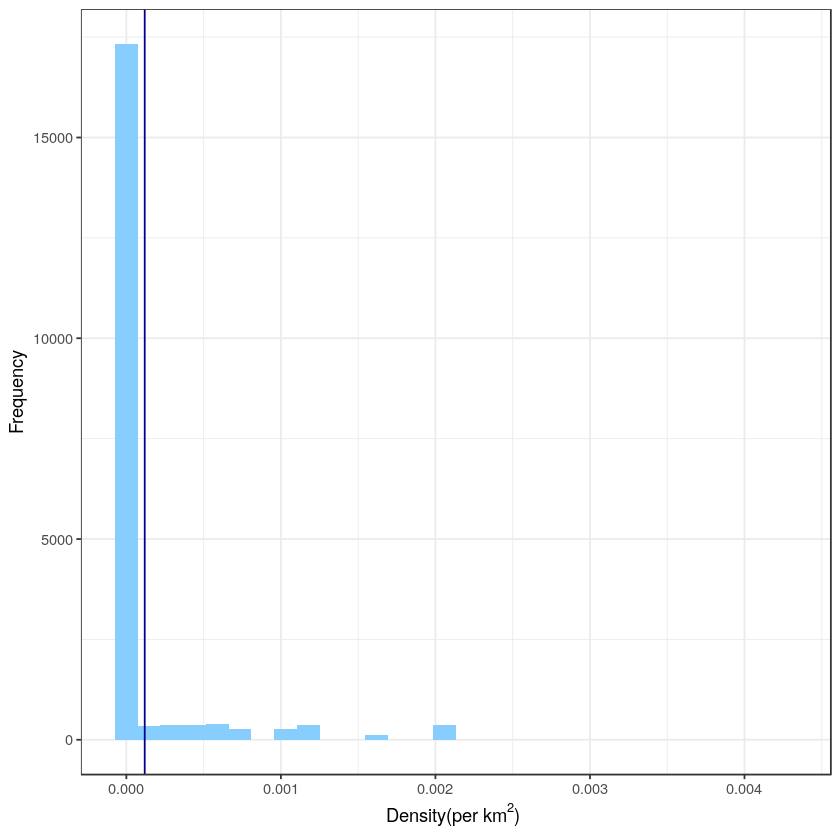

In [60]:
true_sim_den <- mean(all_sims$Density_km)


all_sim_den <- ggplot(data = all_sims) + 
                geom_histogram(aes(x=Density_km), fill = 'skyblue1') +
                xlab(expression(paste("Density(per ", km^2,")", sep=" "))) +
                ylab('Frequency') +
                theme_bw()
all_sim_den + geom_vline(xintercept = true_sim_den, color = 'darkblue')


standard_deviation <- sd(Density_km)
#plot(density(Density_km))

#### Percentage error

The proportion at which the mean of each combination is above or below the true mean. It's a measure of spread but just another way of looking at it - probably better than a hist above.

Just need an apply function to calculate distance from true mean and then calculate to a proportion but how? find largest distance and between 0 (true mean) and that distance set as a proprtion. I think you take everything from true mean and mean is 0 and then proportion.

**Density estimates for all simulations are highly variable (low precision and low accuracy)**.All estimates are discrete right and highly skewed which is why I have chosen histogram over boxplot or density plot.

#### Analysis of each combination

So, where is this variation coming from?
* Look at the variation within combinations (10 runs for all 1344 combos), is the variation consistent? i.e, for one combination, will you have a small standard deviation in x number of runs.
* Look at variation among combinations - what is the coefficient of variation, which combos are outlining, do they all have something in common?

In [61]:
per_sim_density <- function(df){
  
  # Calculate density for each simulation and add
  Density_km <- calcDensity(df$Actual_hits, df$Area_km)
  False_Density_km <- calcDensity(df$Total_hits, df$Area_km)
  
  df <- cbind(df, Density_km)
  df <- cbind(df, False_Density_km)
  
  return(df)
}


for(i in 1:length(current_sims)){
    unique_cams = unique(current_sims[[i]]$Camera)
    unique_speed = c(1, 2)
    current_sims[[i]] = merge(current_sims[[i]], cam_table)
    current_sims[[i]] <- per_sim_density(current_sims[[i]])
}



#calcArea(current_sims[[1]])
current_sims[[6]]

Camera,Speed,Animal,Animal_path,UAV_path,Bias,Total_hits,Actual_hits,Area_km,Density_km,False_Density_km
<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>
garmin,1,reef,straight,lawnmower,yes,6,2,937.9,0.002132423,0.006397270
garmin,1,reef,straight,lawnmower,no,6,2,937.9,0.002132423,0.006397270
garmin,1,nurse,stop75,figure8,yes,4,1,937.9,0.001066212,0.004264847
garmin,1,reef,random120,figure8,yes,0,0,937.9,0.000000000,0.000000000
garmin,1,reef,straight,figure8,yes,0,0,937.9,0.000000000,0.000000000
garmin,1,reef,straight,figure8,no,0,0,937.9,0.000000000,0.000000000
garmin,1,nurse,random120,lawnmower,yes,0,0,937.9,0.000000000,0.000000000
garmin,1,nurse,straight,lawnmower,yes,5,2,937.9,0.002132423,0.005331059
garmin,1,reef,stop50,lawnmower,yes,6,2,937.9,0.002132423,0.006397270


In [63]:
per_density_table <- function(df){
  ##### Calculate density for each individual combination ####
  den_vect <- subset(df, select = ('Density_km'))
  #print(den_vect)
  return(den_vect)
}

den_table <- c(1:1344)
for(i in current_sims){
  t <- per_density_table(i)
  den_table <- cbind(den_table, t)
}

cols.dont.want <- c('den_table')
den_table <- den_table[, ! names(den_table) %in% cols.dont.want, drop = F]
#den_table


### Analyze density table for mean, sd and cv for all runs of each combination ###
combo_mean <- apply(den_table, 1, function(x) mean(x))
combo_sd <- apply(den_table, 1, function(x) sd(x))

combo_stats <- cbind(combo_mean, combo_sd)

combo_cv <- apply(combo_stats, 1, function(x) (x[2]/ x[1])*100)
combo_stats <- cbind(combo_stats, combo_cv)
     
# Remove NaNs
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.nan))

combo_stats[is.nan(combo_stats)] <- 0
                  
combo_stats
             

combo_mean,combo_sd,combo_cv
0.002132423,0.0000000000,0.00000
0.002132423,0.0000000000,0.00000
0.001066212,0.0000000000,0.00000
0.000000000,0.0000000000,0.00000
0.000000000,0.0000000000,0.00000
0.000000000,0.0000000000,0.00000
0.000000000,0.0000000000,0.00000
0.002132423,0.0000000000,0.00000
0.002061343,0.0002752947,13.35511
0.002132423,0.0000000000,0.00000


From combo_stats table, we expect the standard deviation. and thus coefficient of variation, to be very small. The same flight under the same conditions would mostly yield the same result. Speed however will change during the flight which will affect capture - important to note for later analysis.

In [87]:
# How much does mean density differ among flights? 
# You have done this above when looking at mean density differing among all simulations -
# This suggests little within flight variation
# hist(combo_mean)

# Does the variation within flights differ among flights?
# hist(combo_sd)
# Nope

#hist(combo_cv)
# Coefficient of variation indicates some big outliers - should investigate

all_com <- cbind(sim1[1:6], combo_stats)
#non_zero_com <- all_com[apply(all_com[,-1], 1, function(x) !all(x==0)),]


#all_com

iqr <- summary(all_com$combo_cv)
outliers <- sum(all_com$combo_cv > 0) # 1255 have no cv, 89 do.
outliers_pos <- which(all_com$combo_cv > 0)

# Subset sims with a higher variation
out_df <- all_com[outliers_pos,]
#out_df
#out_df - A lot of them are birds which travel faster

Animal,Animal_path,Camera,UAV_path,Speed,Bias,combo_mean,combo_sd,combo_cv
<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>
reef,straight,garmin,lawnmower,1,yes,0.002132423,0.0000000000,0.00000
reef,straight,garmin,lawnmower,1,no,0.002132423,0.0000000000,0.00000
reef,straight,garmin,lawnmower,2,yes,0.001066212,0.0000000000,0.00000
reef,straight,garmin,lawnmower,2,no,0.000000000,0.0000000000,0.00000
reef,straight,garmin,figure8,1,yes,0.000000000,0.0000000000,0.00000
reef,straight,garmin,figure8,1,no,0.000000000,0.0000000000,0.00000
reef,straight,garmin,figure8,2,yes,0.000000000,0.0000000000,0.00000
reef,straight,garmin,figure8,2,no,0.002132423,0.0000000000,0.00000
reef,straight,sony,lawnmower,1,yes,0.002061343,0.0002752947,13.35511


#### Assess density estimates vs. abundance

Randomly sample from all_sims and calculate mean density estimate. 

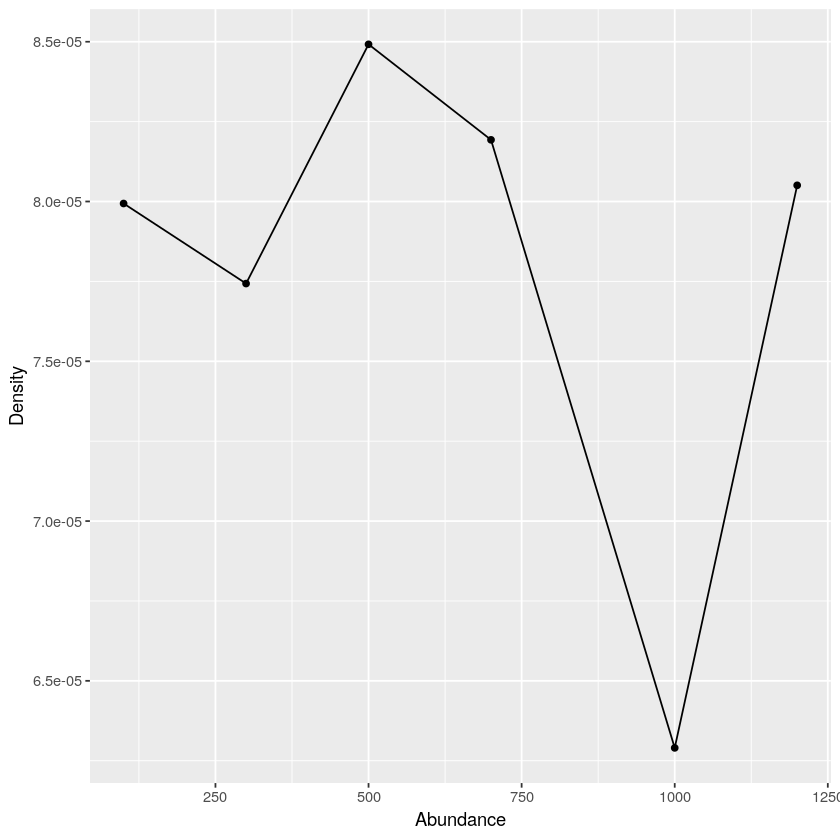

In [73]:
abundance_gen <- function(n, df = all_sims){
    # Randomly select rows to represent abundance
    n <- sample_n(df, n)
    return(n)
}


abundance_density <- function(df){
    z <- sum(df$Actual_hits)
    A <- sum(df$Area_km)
    density <- calcDensity(z, A)
    return(density)
}

#random10 <- abundance_gen(10)
#random30 <- abundance_gen(30)
#random50 <- abundance_gen(50)
#random70 <- abundance_gen(70)
#random100 <- abundance_gen(100)
#random120 <- abundance_gen(120)

abund_table <- function(str_list){
    # Calculate the overall density and standard distribution for subset
    table <- data.frame('Abundance'= 0, 'Density'= 0, 'S_D' = 0)
    for(i in str_list){
        set <- abundance_gen(i)
        density <- abundance_density(set)
        stand_dev <- sd(set$Density_km)
        row <- c(i, density, stand_dev)
        table <- rbind(table, row)
    }
    table <- table[-1,]
    colnames(table) <- c("Abundance", "Density", "SD")
    return(table)
}



abundances <- c(100,300,500,700,1000,1200)

ab <- abund_table(abundances)
#colnames(ab) <- c("Abundance", "Density", "SD")

abund_graph <- ggplot(ab, aes(x = Abundance, y = Density)) +
                    geom_line()+
                    geom_point()
abund_graph

**Most of the data is 0 and density for an array of abundances are turning out to be the same. Either :**
1. More simulations
2. Cut out 0s and explore the impact of abundance on density if hits occur.
3. Look at encounter rate instead of density.

Lucas(2015) percentage errors are a bit strange - they go into the minus. I know percentage error is different to the total standard as it takes the distance of each individual estimate to the true mean.

#### Assess density estimates vs. encounter rate

Will the number of hits affect model precision and accuracy?

Actual_hits,Encounters,Area,hit_dens,s_d,hit_error
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0,17330,50038949.0,0.0003463302,0.0000000000,0.000000e+00
1,1258,3582200.0,0.0003511808,0.0003163425,1.581712e-04
2,1449,3748004.9,0.0003866057,0.0006607762,3.303881e-04
3,122,617628.2,0.0001975298,0.0000986489,4.932445e-05
4,1,937.9,0.0010662117,NA,NA


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

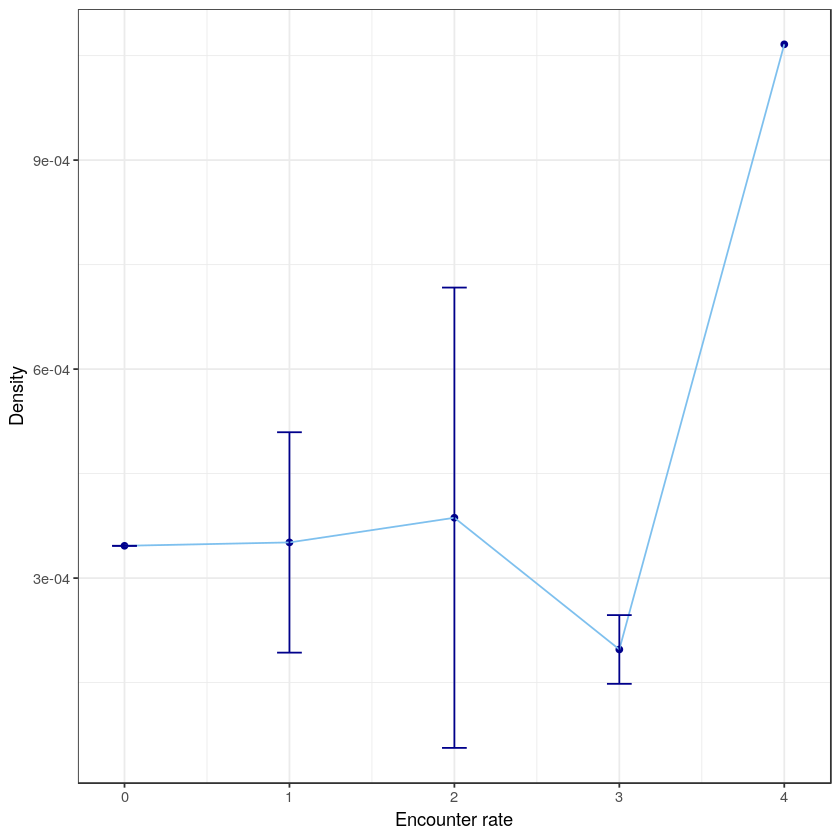

In [75]:
# For each group of encounters, what was the density calculation and error
# Subset all_sims by number of encounters, counting the amount in that category and the total area
hit_tab <- all_sims %>% 
            group_by(Actual_hits) %>%
                summarise(Encounters = length(Actual_hits),
                          Area = sum(Area_km))

hit_sd <- function(df1, df2){
    s_d <-c()
    for(i in df1$Actual_hits){
        df <- subset(df2, df2$Actual_hits == i)
        stand <- sd(df$Density_km)
        s_d <- c(s_d, stand)
    }
    return(s_d)
}

s_d <- hit_sd(hit_tab, all_sims)
hit_dens <- apply(hit_tab, 1, function(x) calcDensity(x[2],x[3])) # Density = total number of encounters/Area
hit_tab <- cbind(hit_tab, hit_dens)
hit_tab <- cbind(hit_tab, s_d)

hit_error <- sapply(s_d, function(x) x/2)
hit_tab <- cbind(hit_tab, hit_error)        
hit_tab
                  
hit_plot <- ggplot(hit_tab, aes(x=Actual_hits, y = hit_dens)) +
                  geom_point(colour="darkblue")+
                  geom_line(colour='skyblue2') +
                  geom_errorbar(aes(ymin=hit_dens-hit_error, ymax = hit_dens+hit_error), width=.15,
                 position=position_dodge(0.05), colour='darkblue')

hit_plot + labs(x="Encounter rate", y = "Density")+
   theme_bw() 
   

### Impact of variables

Split data into groups to assess how density estimates change with:

1. Area
2. Species
3. Species path
4. Bias
5. Flight path
6. Flight seed

### Point plot analysis

Point plot analysis subsets each variable to attain the number of hits, area, density and standard deviation for that variable set. Boxplot analysis, further down, splits the overall dataset as every value is needed for the IQR of the boxplot.

In [81]:
# Dplyr subset by diffferent categories and compare model precision and accuracy

animal <- all_sims %>% 
            group_by(Animal) %>%
                summarise(Encounters = sum(Actual_hits),
                          Ave_E = mean(Actual_hits),
                          Area = sum(Area_km), 
                          SD = sd(Density_km),
                          SD_E = sd(Actual_hits))


animal_path <- all_sims %>% 
            group_by(Animal_path) %>%
                summarise(Encounters = sum(Actual_hits),
                          Ave_E = mean(Actual_hits),
                          Area = sum(Area_km),
                          SD = sd(Density_km),
                          SD_E = sd(Actual_hits))


camera <- all_sims %>% 
            group_by(Camera) %>%
                summarise(Encounters = sum(Actual_hits),
                          Ave_E = mean(Actual_hits),
                          E_rate = mean(Actual_hits),
                          Area = sum(Area_km), 
                          SD = sd(Density_km),
                          SD_E = sd(Actual_hits))


uav_path <- all_sims %>% 
            group_by(UAV_path) %>%
                summarise(Encounters = sum(Actual_hits),
                          Ave_E = mean(Actual_hits),
                          Area = sum(Area_km),
                          SD = sd(Density_km),
                          SD_E = sd(Actual_hits))


speed <- all_sims %>% 
            group_by(Speed) %>%
                summarise(Encounters = sum(Actual_hits),
                          Ave_E = mean(Actual_hits),
                          Area = sum(Area_km),
                          SD = sd(Density_km),
                          SD_E = sd(Actual_hits))


bias <- all_sims %>% 
            group_by(Bias) %>%
                summarise(Encounters = sum(Actual_hits),
                          Ave_E = mean(Actual_hits),
                          Area = sum(Area_km),
                          SD = sd(Density_km),
                          SD_E = sd(Actual_hits))



# Calculate density for each subsetted variable
variables <- list(animal, animal_path, camera, uav_path, speed, bias)
df_list <- list()
for(i in 1:length(variables)){
    c <- as.data.frame(variables[i])
    sub_c <- cbind(c[,2], c[,4]) # Make sure column index indicates encounters and area
    #print(sub_c)
    hit_dens <- apply(sub_c, 1, function(x) calcDensity(x[1], x[2]))
    #print(hit_dens)
    c <- cbind(c, hit_dens)
    df_list <- c(df_list, list(c))
    #i <- cbind(i, s_d)
}
 
# Seperate back into dataframes for analysis
animal <- as.data.frame(df_list[1])
animal_path <- as.data.frame(df_list[2])
camera <- as.data.frame(df_list[3])
uav_path <- as.data.frame(df_list[4])
speed <- as.data.frame(df_list[5])
speed$Speed <- as.character(speed$Speed) # Speed level as factor not integer
bias <- as.data.frame(df_list[6])
                      
animal

Animal,Encounters,Ave_E,Area,SD,SD_E,hit_dens
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
booby,105,0.041666667,7248465,1.484967e-04,0.23794892,1.448583e-05
frigate,12,0.004761905,7248465,4.585629e-05,0.06885572,1.655523e-06
manatee,719,0.285317460,7248465,4.082149e-04,0.62749518,9.919342e-05
nurse,1946,0.772222222,7248465,5.848142e-04,0.91375957,2.684706e-04
ray,0,0.000000000,7248465,0.000000e+00,0.00000000,0.000000e+00
reef,959,0.380555556,7248465,5.118560e-04,0.78544906,1.323039e-04
tern,61,0.024206349,7248465,1.136016e-04,0.17767790,8.415575e-06
whale_shark,724,0.287301587,7248465,4.097041e-04,0.62943343,9.988322e-05


### Point Plots: Density at Each Variable Level

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


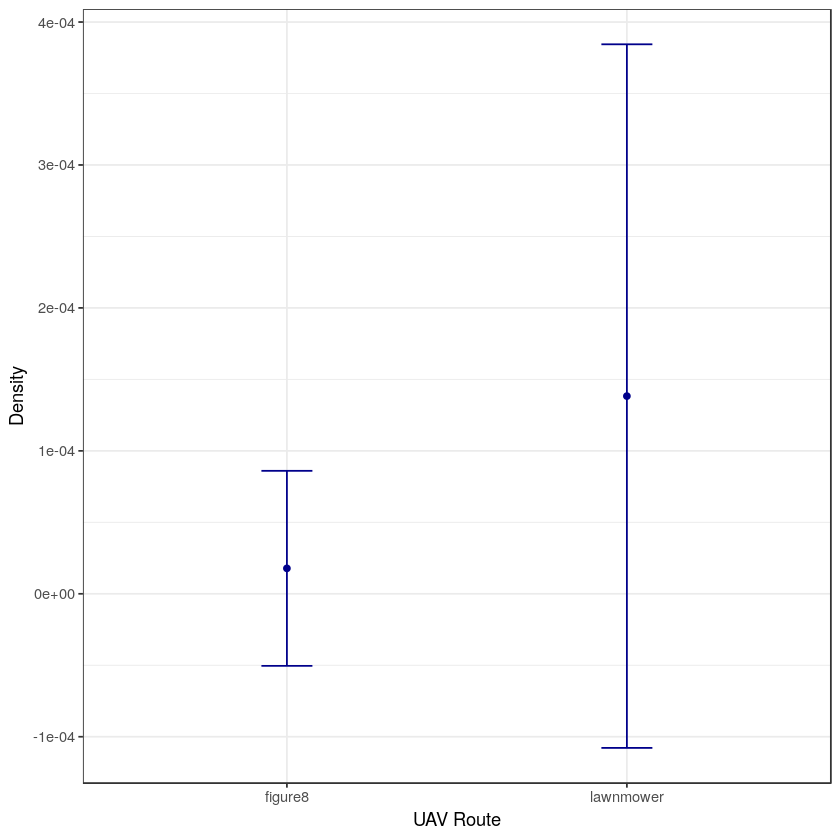

In [82]:
den_point <- function(df, name){
    plot <-  ggplot(df, aes(x=df[,1], y = hit_dens)) +
                  geom_point(colour="darkblue")+
                  geom_line(colour='skyblue2') +
                  geom_errorbar(aes(ymin=hit_dens-(SD/2), ymax = hit_dens+(SD/2)), width=.15,
                  position=position_dodge(0.05), colour='darkblue') +
                  labs(x=name, y = "Density") +
                  theme_bw() 
    return(plot)
}

Den_point_ani <- den_point(animal, "Animal")
Den_point_anip <- den_point(animal_path, "Movement Model")
Den_point_cam <- den_point(camera, "Camera")
Den_point_uavp <- den_point(uav_path, "UAV Route")
Den_point_spee <- den_point(speed, "Speed Level")
Den_point_bias <- den_point(bias, 'Bias')

Den_point_uavp

### Bar Plots: Number of Encounters and Encounter Rate at Each Variable Level

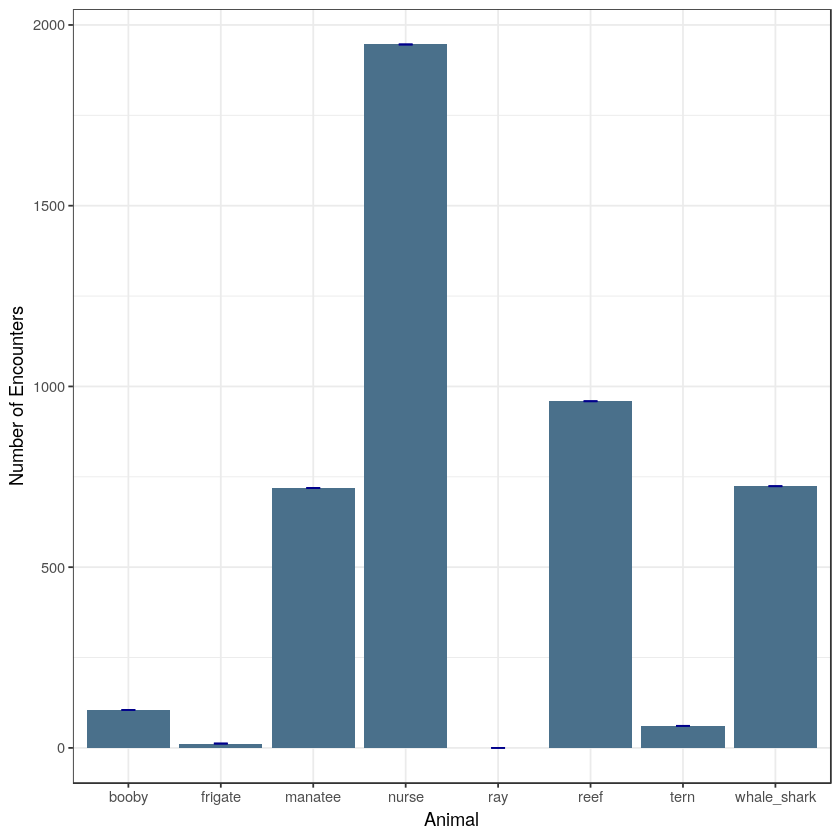

In [83]:
numb_E_bar <- function(df, name){
    plot <-  ggplot(df, aes(x=df[,1], y = Encounters)) +
                  geom_bar(stat='identity', fill="skyblue4") +
                  geom_errorbar(aes(ymin=Encounters-(SD_E/2), ymax = Encounters+(SD_E/2)), width=.15,
                  position=position_dodge(0.05), colour='darkblue') +
                  labs(x= name, y = "Number of Encounters") +
                  theme_bw() 
    return(plot)
}

tot_E_ani <- numb_E_bar(animal, "Animal")
tot_E_anip <- numb_E_bar(animal_path, "Movement Model")
tot_E_cam <- numb_E_bar(camera, "Camera")
tot_E_uavp <- numb_E_bar(uav_path, "UAV Route")
tot_E_spee <- numb_E_bar(speed, "Speed Level")
tot_E_bias <- numb_E_bar(bias, "Bias")

tot_E_ani

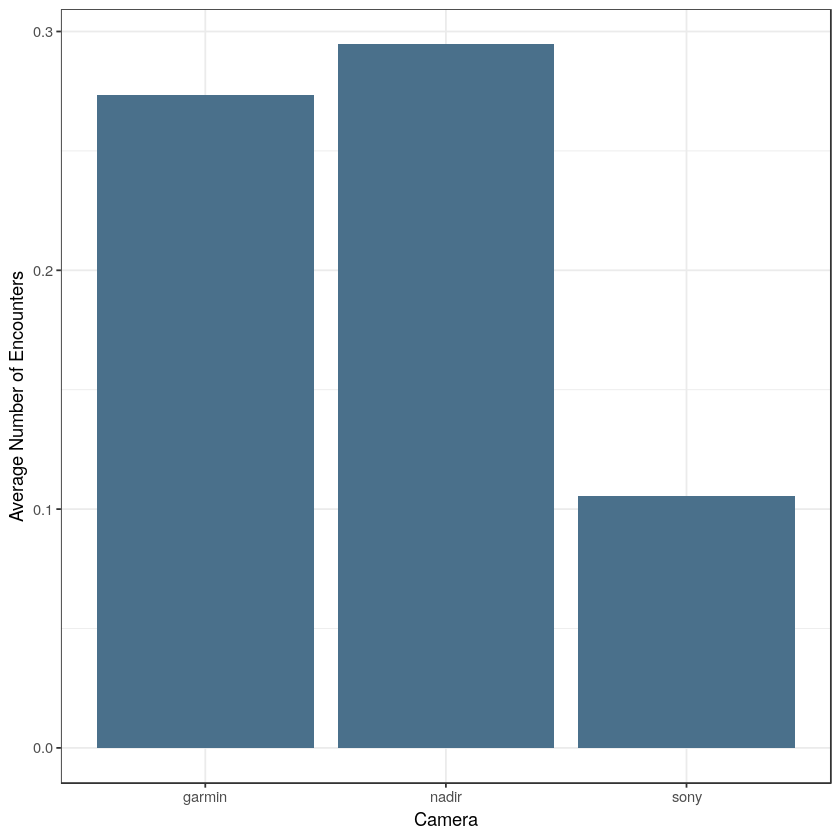

In [84]:
ave_E_bar <- function(df, name){
    plot <-  ggplot(df, aes(x=df[,1], y = Ave_E)) +
                  geom_bar(stat='identity', fill="skyblue4") +
                  #geom_errorbar(aes(ymin=Ave_E-(SD_E/2), ymax = Ave_E+(SD_E/2)), width=.15,
                  #position=position_dodge(0.05), colour='darkblue') +
                  labs(x= name, y = "Average Number of Encounters") +
                  theme_bw() 
    return(plot)
}

mean_E_ani <- ave_E_bar(animal, "Animal")
mean_E_anip <- ave_E_bar(animal_path, "Movement Model")
mean_E_cam <- ave_E_bar(camera, "Camera")
mean_E_uavp <- ave_E_bar(uav_path, "UAV Route")
mean_E_spee <- ave_E_bar(speed, "Speed Level")
mean_E_bias <- ave_E_bar(bias, "Bias")

mean_E_cam

# SD is huge because of the 0 to 145 range in number of hits.

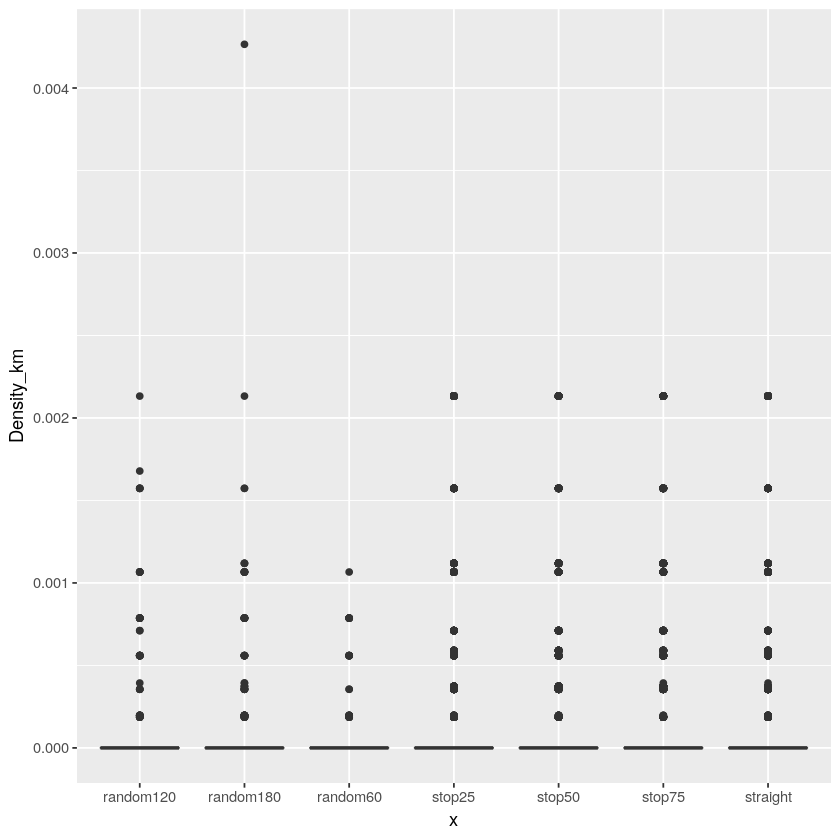

In [93]:
all_sims$Speed <- as.character(all_sims$Speed)

den_box <- function(pos){
    x <- all_sims[,pos]
    plot <- ggplot(all_sims, aes(x=x, y=Density_km))+
            geom_boxplot()
    return(plot)
}

# Area merging function changes column indexes!
ani_box <- den_box(3)
anip_box <- den_box(4)
cam_box <- den_box(1)
uavp_box <- den_box(5)
spee_box <- den_box(2)
bias_box <- den_box(6)

anip_box

**Next, for obvious patterns in the data start subsetting combinations. Example, nurse shark has highest number of encounters - is it consistent or does it vary with another variable? One Way ANOVA I think

In [98]:
# Desnity within different variable groups is different
# All groups measured teh same amount of times (same parameters and runs)

ano_mod <- function(pos){
    x <- all_sims[,pos]
    model <- lm(Density_km ~ x, data = all_sims)
    print(summary(model))
    an_mod <- anova(model)
    print(an_mod)
    return(an_mod)
}

#ani_mod <- lm(Density_km ~ Animal, data = all_sims)
#summary(ani_mod)
#anova(ani_mod)

ani_ano <- ano_mod(3)
anip_ano <- ano_mod(4)
cam_ano <- ano_mod(1)
uavp_ano <- ano_mod(5)
spee_ano <- ano_mod(2)
bias_ano <- ano_mod(6)

ani_ano


Call:
lm(formula = Density_km ~ x, data = all_sims)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0003979 -0.0001551 -0.0000200 -0.0000028  0.0042448 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.004e-05  6.956e-06   2.881  0.00396 ** 
xfrigate     -1.721e-05  9.838e-06  -1.750  0.08018 .  
xmanatee      1.344e-04  9.838e-06  13.657  < 2e-16 ***
xnurse        3.778e-04  9.838e-06  38.404  < 2e-16 ***
xray         -2.004e-05  9.838e-06  -2.037  0.04162 *  
xreef         1.856e-04  9.838e-06  18.867  < 2e-16 ***
xtern        -6.412e-06  9.838e-06  -0.652  0.51458    
xwhale_shark  1.351e-04  9.838e-06  13.731  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0003492 on 20152 degrees of freedom
Multiple R-squared:  0.1227,	Adjusted R-squared:  0.1224 
F-statistic: 402.6 on 7 and 20152 DF,  p-value: < 2.2e-16

Analysis of Variance Table

Response: Density_km
       

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,7,0.0003436757,4.909653e-05,402.6119,0
Residuals,20152,0.0024574368,1.219451e-07,NA,NA
